# Problem Statements: **Thyroid_Disease_Detection**

## **Description:**

Thyroid disease refers to a medical condition that affects the thyroid gland, a butterfly-shaped gland located in the front of the neck. The thyroid gland plays a crucial role in producing hormones that regulate various bodily functions, including metabolism, growth, and development.

There are several types of thyroid diseases, including:

**1. Hypothyroidism:** This occurs when the thyroid gland does not produce enough thyroid hormones. Symptoms may include fatigue, weight gain, sensitivity to cold, depression, and slowed heart rate.

**2. Hyperthyroidism:** In contrast to hypothyroidism, hyperthyroidism refers to an overactive thyroid gland that produces excessive amounts of thyroid hormones. Symptoms may include weight loss, rapid heartbeat, irritability, tremors, and heat intolerance.

**3. Thyroid nodules:** Thyroid nodules are lumps or abnormal growths that form within the thyroid gland. Most nodules are noncancerous (benign) and do not cause noticeable symptoms. However, some nodules can be cancerous or produce excess thyroid hormones.

**4. Thyroiditis:** Thyroiditis is inflammation of the thyroid gland, which can lead to temporary or long-term disruption of thyroid hormone production. It can be caused by viral infections, autoimmune conditions, or certain medications.

**5. Thyroid cancer:** Thyroid cancer is a relatively uncommon form of cancer that originates in the thyroid gland. It is typically treatable and has a high survival rate if detected early.

Thyroid disease can have various causes, including autoimmune disorders (e.g., Hashimoto's thyroiditis, Graves' disease), genetic factors, radiation exposure, certain medications, and iodine deficiency.


The most common blood tests used to diagnose thyroid disease are:

* **Thyroid-stimulating hormone (TSH) test:** This test measures the level of TSH in the blood. TSH is a hormone produced by the pituitary gland that stimulates the thyroid gland to produce thyroid hormones. A high TSH level can indicate hypothyroidism, while a low TSH level can indicate hyperthyroidism.
* **Free T4 test:** This test measures the level of free T4 in the blood. Free T4 is the unbound form of T4, which is the most active form of thyroid hormone. A low free T4 level can indicate hypothyroidism, while a high free T4 level can indicate hyperthyroidism.
* **Free T3 test:** This test measures the level of free T3 in the blood. Free T3 is the unbound form of T3, which is another active form of thyroid hormone. A low free T3 level can indicate hypothyroidism, while a high free T3 level can indicate hyperthyroidism.

Other blood tests that may be ordered include:

* **Thyroid peroxidase antibodies (TPOAb) test:** This test measures the level of TPOAb in the blood. TPOAb are antibodies that attack the thyroid gland. A high level of TPOAb can indicate an autoimmune thyroid disease, such as Hashimoto's thyroiditis.
* **Thyroglobulin antibodies (TgAb) test:** This test measures the level of TgAb in the blood. TgAb are antibodies that attack thyroglobulin, a protein produced by the thyroid gland. A high level of TgAb can indicate an autoimmune thyroid disease, such as Graves' disease.

Imaging tests that may be ordered to diagnose thyroid disease include:

* **Thyroid ultrasound:** This test uses sound waves to create images of the thyroid gland. This can be used to look for nodules, cysts, or other abnormalities in the thyroid gland.
* **Thyroid scan:** This test uses a small amount of radioactive iodine to create images of the thyroid gland. This can be used to look for areas of the thyroid gland that are not functioning properly.

Physical examinations can also be helpful in diagnosing thyroid disease. The doctor will look for signs of hypothyroidism, such as weight gain, fatigue, and cold intolerance. The doctor will also look for signs of hyperthyroidism, such as weight loss, anxiety, and heat intolerance.



# Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

from scipy.stats import skew


import pickle

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.api import add_constant


# import the train_test_split library
from sklearn.model_selection import train_test_split

# importing the SMOTE library
from imblearn.over_sampling import SMOTE

# ML classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


# performance parameters
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Reading Datasets

## Sort Information Of Datasets:

Here are the features of the datasets *allhypo.data* and *allhyper.data*, which are related to thyroid disease:

* **Age:** Age in years
* **Sex:** Gender (M or F)
* **On Thyroxine:** If the patient is currently taking thyroxine (1 or 0)
* **Thyroid Status:** Whether the patient has hypothyroid (1) or hyperthyroid (0) disease
* **TSH:** Thyroid-stimulating hormone level in milli-international units per liter (mIU/L)
* **T4:** Free thyroxine level in nanograms per deciliter (ng/dL)
* **T3:** Free triiodothyronine level in nanograms per deciliter (ng/dL)
* **FTI:** Free thyroxine index
* **TBG:** Thyroxine-binding globulin level in milligrams per deciliter (mg/dL)
* **RT3U:** Reverse triiodothyronine level in nanograms per deciliter (ng/dL)

The datasets also include the following two header lines:

```
@RELATION thyroid

@ATTRIBUTE Age NUMERIC
@ATTRIBUTE Sex {M, F}
@ATTRIBUTE On Thyroxine {0, 1}
@ATTRIBUTE Thyroid Status {0, 1}
@ATTRIBUTE TSH NUMERIC
@ATTRIBUTE T4 NUMERIC
@ATTRIBUTE T3 NUMERIC
@ATTRIBUTE FTI NUMERIC
@ATTRIBUTE TBG NUMERIC
@ATTRIBUTE RT3U NUMERIC
```

These header lines provide information about the data types of the features and the names of the features.



In [67]:
df_hypo = pd.read_csv('data/allhypo.data', header = None, index_col = False)
df_hyper = pd.read_csv('data/allhyper.data', header = None, index_col = False)


In [68]:
df_hypo.shape

(2800, 30)

In [69]:
df_hypo.columns.unique()

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype='int64')

In [70]:
df_hyper.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [71]:
df_hyper.shape

(2800, 30)

# Data Processing

**This code will read the two thyroid datasets into Pandas DataFrames. The column names are defined in the columns variable. The read_csv() function is used to read the data from the files. The na_values parameter is used to specify the values that represent missing data. The index_col parameter is used to specify the column that should be used as the index.**

In [72]:
# Import the necessary libraries
import pandas as pd

# Define the column names
columns = ["age", "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick", "pregnant",
           "thyroid surgery", "I131 treatment", "query hypothyroid", "query hyperthyroid", "lithium", "goitre",
           "tumor", "hypopituitary", "psych", "TSH measured", "TSH", "T3 measured", "T3", "TT4 measured", "TT4",
           "T4U measured", "T4U", "FTI measured", "FTI", "TBG measured", "TBG", "referral source", "labels"]

# Read the hypothyroid data into a Pandas DataFrame
df_hypo = pd.read_csv("data/allhypo.data", names=columns, na_values=["?"], index_col=False)

# Read the hyperthyroid data into a Pandas DataFrame
df_hyper = pd.read_csv("data/allhyper.data", names=columns, na_values=["?"], index_col=False)

# Print the column names of the hypothyroid DataFrame
print(df_hypo.columns)

# Print the first few rows of the hypothyroid DataFrame
print(df_hypo.head())

# Print the column names of the hyperthyroid DataFrame
print(df_hyper.columns)

# Print the first few rows of the hyperthyroid DataFrame
print(df_hyper.head())


Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'labels'],
      dtype='object')
    age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41.0   F            f                  f                         f    f   
1  23.0   F            f                  f                         f    f   
2  46.0   M            f                  f                         f    f   
3  70.0   F            t                  f                         f    f   
4  70.0   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyro

* Splitting the labels column at | into two columns: 'class' and 'id'.
* After that dropping the labels column.

In [73]:
# Split the labels column into two columns: hypo_class and id
df_hypo[['hypo_class','id']] = df_hypo.labels.str.split("|",expand = True)

# Drop the labels column
df_hypo.drop('labels', axis = 1, inplace = True)

# Split the labels column into two columns: hyper_class and id
df_hyper[['hyper_class','id']] = df_hyper.labels.str.split("|",expand = True)

# Drop the labels column
df_hyper.drop('labels', axis = 1, inplace = True)


In [74]:
# Print the hypothyroid DataFrame
print(df_hypo.columns)

# Print the hyperthyroid DataFrame
print(df_hyper.columns)

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'hypo_class', 'id'],
      dtype='object')
Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'hyper_class', 'id'],
      dtype='object')


* Replacing the '.' in 'class' column with space ('')


In [75]:
df_hypo['hypo_class'] = df_hypo['hypo_class'].str.replace('.', '')
df_hyper['hyper_class'] = df_hyper['hyper_class'].str.replace('.', '')


* Let's make Deep copying both the datasets for future reference.

In [76]:
df_hypo_copy = df_hypo.copy(deep=True)
df_hyper_copy = df_hyper.copy(deep=True)


* Let's Check unique value of `hypo_calss` and `hyper_class`

In [77]:
print(df_hypo['hypo_class'].unique())
print(df_hyper['hyper_class'].unique())


['negative' 'compensated hypothyroid' 'primary hypothyroid'
 'secondary hypothyroid']
['negative' 'hyperthyroid' 'T3 toxic' 'goitre']


* **Since we are classifying only in three categories: `negative`, `hypothyroid`, and `hyperthyroid`.**

* let's replace other values with 'negative', 'hypothyroid', and 'hyperthyroid'.

In [78]:
df_hypo.replace(['compensated hypothyroid', 'primary hypothyroid',\
                 'secondary hypothyroid'], 'hypothyroid', inplace = True)

df_hyper.replace(['T3 toxic', 'goitre'], 'hyperthyroid', inplace = True)


* **Since all values are common in both the datasets expect 'class'.**
* **So, we can concatnate both the datasets.**

In [79]:
df_concat = pd.concat([df_hypo, df_hyper.iloc[:, -2]], axis=1)
df_concat.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,hypo_class,id,hyper_class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,1.14,t,109.0,f,NaN,SVHC,negative,3733,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,negative,1442,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,0.91,t,120.0,f,NaN,other,negative,2965,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,negative,806,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,0.87,t,70.0,f,NaN,SVI,negative,2807,negative


In [80]:
df_concat.shape

(2800, 32)

* let's make deep copy of concat datasets

In [81]:
df_new = df_concat.copy(deep = True)

Now, the conditions based on which we are replacing the 'class' value with any of the 'class' i.e. 'hypo_class' or 'hyper_class'

- neg + neg = neg
- hypo + neg = hypo
- hyper + neg = hyper

In [82]:
df_new.to_csv('data/df_new.csv', index = False)

In [83]:
df_concat['labels'] = np.where(((df_concat['hypo_class'] != 'negative') & \
                                (df_concat['hyper_class'] == 'negative')), df_concat['hypo_class'],\
                      np.where((df_concat['hyper_class'] != 'negative'), df_concat['hyper_class'],'negative'))


In [84]:
df_concat.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U,FTI measured,FTI,TBG measured,TBG,referral source,hypo_class,id,hyper_class,labels
0,41.0,F,f,f,f,f,f,f,f,f,...,1.14,t,109.0,f,NaN,SVHC,negative,3733,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,other,negative,1442,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,0.91,t,120.0,f,NaN,other,negative,2965,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,other,negative,806,negative,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,0.87,t,70.0,f,NaN,SVI,negative,2807,negative,negative


* Lebels Added now feature is 33

* **Dopping those columns (features) which are not relevant and storing it in a new dataframe.**

In [85]:
df = df_concat.drop(['referral source', 'TBG', 'hypo_class', 'id', 'hyper_class'], axis = 1)


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on thyroxine               2800 non-null   object 
 3   query on thyroxine         2800 non-null   object 
 4   on antithyroid medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid surgery            2800 non-null   object 
 8   I131 treatment             2800 non-null   object 
 9   query hypothyroid          2800 non-null   object 
 10  query hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

Some columns are just indicating whether next column in the same row has some value or not. Like 'TSH measured' have 'true' & 'false' value. 

The 'true' means, the next column in the same row has some value and 'false' means, next column in the same row has 'NaN'. So, we are any ways going to handle the missing values, there is no point of having such columns in our dataset.

Let's drop these feature columns.

For Example

In [87]:
df[['TSH measured', 'TSH']].tail(10)


,TSH measured,TSH
2790,t,2.10
2791,t,1.00
2792,f,NaN
2793,t,0.03
2794,t,1.90
2795,t,2.70
2796,f,NaN
2797,f,NaN
2798,t,1.40
2799,t,1.20


In [88]:
df = df.drop(['TSH measured','T3 measured','TT4 measured','T4U measured',\
              'FTI measured','TBG measured'], axis = 1)


In [89]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,labels
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative


# Types Of Datasets

- categorical
    - nominal (order not matter)
    - ordinal (order matter)

- numerical
    - discrete (discrete data is counted)
    - continuous (continuous data is measured)


* let print categorical featues

In [90]:
cat_features = [i for i in df.columns if (df[i].dtype == 'O')]
cat_features

['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'labels']

In [91]:
len(cat_features)

16

* Numerical Features

In [92]:
num_features = [i for i in df.columns if (df[i].dtype != 'O')]
num_features

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [93]:
for i in cat_features:
    print('==='*20)
    print(i, 'feature: unique values: ', df[i].unique())
    
print('==='*20)


sex feature: unique values:  ['F' 'M' nan]
on thyroxine feature: unique values:  ['f' 't']
query on thyroxine feature: unique values:  ['f' 't']
on antithyroid medication feature: unique values:  ['f' 't']
sick feature: unique values:  ['f' 't']
pregnant feature: unique values:  ['f' 't']
thyroid surgery feature: unique values:  ['f' 't']
I131 treatment feature: unique values:  ['f' 't']
query hypothyroid feature: unique values:  ['f' 't']
query hyperthyroid feature: unique values:  ['f' 't']
lithium feature: unique values:  ['f' 't']
goitre feature: unique values:  ['f' 't']
tumor feature: unique values:  ['f' 't']
hypopituitary feature: unique values:  ['f' 't']
psych feature: unique values:  ['f' 't']
labels feature: unique values:  ['negative' 'hypothyroid' 'hyperthyroid']


In [94]:
for i in num_features:
    print('==='*12)
    print(i, 'feature: unique values: ', len(df[i].unique()))
    
print('==='*12)


age feature: unique values:  94
TSH feature: unique values:  264
T3 feature: unique values:  65
TT4 feature: unique values:  218
T4U feature: unique values:  139
FTI feature: unique values:  210


In [95]:
for i in num_features:
    print('==='*12)
    print(i, 'feature: minimum value: ', min(df[i].unique()))
    print(i, 'feature: maximum value: ', max(df[i].unique()))
    
print('==='*12)


age feature: minimum value:  1.0
age feature: maximum value:  455.0
TSH feature: minimum value:  0.005
TSH feature: maximum value:  478.0
T3 feature: minimum value:  0.05
T3 feature: maximum value:  10.6
TT4 feature: minimum value:  2.0
TT4 feature: maximum value:  430.0
T4U feature: minimum value:  0.31
T4U feature: maximum value:  2.12
FTI feature: minimum value:  2.0
FTI feature: maximum value:  395.0


#### Obeservations:
Categorical features: 15
- all are nominal data

Numerical features: 6
- discrete data: 1
- continous data: 5


#### Let's see some more insights of Categorical and Numerical Data

In [96]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000


In [97]:
# categorical data
df.describe(include = 'object')


,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,labels
count,2690,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3
top,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,negative
freq,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,2786,2775,2729,2799,2665,2503


### Handling Null Value

In [98]:
df.isnull().sum()


age                            1
sex                          110
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          284
T3                           585
TT4                          184
T4U                          297
FTI                          295
labels                         0
dtype: int64

#### Observations:
- age has maximum value 455 which is not possible (an outlier)
- each categorical features has two unique value except labels which has three unique values
- NULL values:
    - age: 1
    - sex: 110
    - TSH: 284
    - T3: 585
    - TT4: 184
    - T4U: 297
    - FTI: 295
    

#### Let's handle NaN value in numerical column(s)

In [99]:
numerical_null = [i for i in df.columns if (df[i].dtype != 'O' and df[i].isnull().sum() != 0)]
numerical_null


['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [100]:
df[df['age'].isnull()]


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,labels
1985,NaN,F,t,f,f,f,f,f,t,f,...,f,f,f,f,0.6,1.5,120.0,0.82,146.0,negative


Replacing 'NaN' value withe median of the 'age' column


In [101]:
df['age'].replace([np.nan],df['age'].median(), inplace = True)


Let's check the numerical columns again.


In [102]:
numerical_null = [i for i in df.columns if (df[i].dtype != 'O' and df[i].isnull().sum() != 0)]
numerical_null


['TSH', 'T3', 'TT4', 'T4U', 'FTI']

Filling the 'NaN' values with 'median' of that column in all the numerical columns.


In [103]:
for i in numerical_null:
   df[i].fillna(df[i].median(),inplace = True)


In [104]:
df.isnull().sum()

age                            0
sex                          110
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                            0
T3                             0
TT4                            0
T4U                            0
FTI                            0
labels                         0
dtype: int64

#### Let's handle NaN value in categorical column(s)

Seperating the 'object' and 'int' or 'float' columns and storing 'object' into 'categorical'.


In [105]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
categorical


['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'labels']

In [106]:
categorical_null = [i for i in df.columns if (df[i].dtype == 'O' and df[i].isnull().sum() != 0)]
categorical_null


['sex']

Replace missing values with the most frequent value, called 'mode'.


In [107]:
for i in categorical_null:
    df[i].fillna(df[i].mode()[0], inplace = True)
    

In [108]:
df[categorical_null].isnull().any()

sex    False
dtype: bool

In [109]:
df.isnull().sum().any()

False

In [110]:
df.isnull().sum().sum()

0

* No null value presents

# Data Transformation

In [111]:
numerical_all = [i for i in df.columns if (df[i].dtype != 'O')]
numerical_all

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [112]:
df_filled = df.copy(deep = True)

In [113]:
plt.style.use('dark_background')

In [117]:
def checkPlot(dataframe, feat):
    
    m = []


#     print("-------LOG Transformation-------")

    log_target = np.log1p(dataframe[feat])  
    df_filled['log_'+i] = pd.DataFrame(log_target)

    
    plt.rcParams["figure.figsize"] = 13,5
    fig,ax = plt.subplots(1,2)
    sns.distplot(dataframe[feat], label= "Orginal Skew:{0}".format(np.round(skew(dataframe[feat]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
    sns.distplot(log_target, label= "Transformed Skew:{0}".format(np.round(skew(log_target),4)), color="b", ax=ax[1], axlabel="LOG TRANSFORMED")
    fig.legend()
    m.append(np.round(skew(log_target),4))
    
    
#     print("-------Square Root Transformation-------")

    sqrrt_target = dataframe[feat]**(1/2)
    df_filled['sqrroot_'+i] = pd.DataFrame(sqrrt_target)
    
    plt.rcParams["figure.figsize"] = 13,5
    fig,ax = plt.subplots(1,2)
    sns.distplot(dataframe[feat], label= "Orginal Skew:{0}".format(np.round(skew(dataframe[feat]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
    sns.distplot(sqrrt_target, label= "Transformed Skew:{0}".format(np.round(skew(sqrrt_target),4)), color="b", ax=ax[1], axlabel="SQUARE ROOT TRANSFORMED")
    fig.legend()
    m.append(np.round(skew(sqrrt_target),4))

    print(m)
    
 


In [118]:
import warnings
warnings.filterwarnings('ignore')

In [124]:

# for i in df_filled[numerical_all]:
    
#     print(" Plots after transformations for col : ",  i)   
    
#     checkPlot(df_filled, i)



#### Observations:

- After Applying Transforamtion and Calculating the Skewness, we found best result for numerical features:
- Age: **SQRT**
- TSH: **LOG**
- T3:  **SQRT**
- TT4: **SQRT**
- T4U: **LOG**
- FTI: **SQRT**


In [125]:
df_transformed = df_filled.copy(deep = True)

In [126]:
df_transformed.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'labels', 'log_age'],
      dtype='object')

In [127]:
df_transformed.shape


(2800, 23)

In [129]:
print(df_transformed.columns)

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'labels', 'log_age'],
      dtype='object')


#### Since, only the above transforamtion are useful in our case, we will drop others

#### Now Dropping transformed columns which are not useful in our case

In [132]:
df_transformed.drop(['age', 'log_age', \
                     'TSH', 'sqrroot_TSH', \
                     'T3', 'log_T3', \
                     'TT4', 'log_TT4', \
                     'T4U', 'sqrroot_T4U', \
                     'FTI', 'log_FTI'], axis = 1, inplace = True)


KeyError: "['sqrroot_TSH', 'log_T3', 'log_TT4', 'sqrroot_T4U', 'log_FTI'] not found in axis"

In [133]:
df_transformed.columns


Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'labels', 'log_age'],
      dtype='object')

In [134]:
df_transformed.shape


(2800, 23)

### Data Encoding

Let's extract the Categorical features.

In [135]:
df_transformed_cat = df_transformed.select_dtypes(include = ['object','category'])
df_transformed_cat.columns

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'labels'],
      dtype='object')

In [136]:
df_transformed_cat.shape

(2800, 16)

#### Apply the One Hot Encoding

In [137]:
df_onehot_encoded = pd.get_dummies(df_transformed_cat.iloc[:,:-1], drop_first = True)


In [138]:
df_onehot_encoded.columns


Index(['sex_M', 'on thyroxine_t', 'query on thyroxine_t',
       'on antithyroid medication_t', 'sick_t', 'pregnant_t',
       'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t',
       'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t'],
      dtype='object')

In [139]:
df_onehot_encoded.shape

(2800, 15)

Now, let's do the label encoding on the target/labels columns (dependent feature)

In [140]:
df_transformed_label = pd.DataFrame(df_transformed_cat.iloc[:,-1])
df_transformed_label.head()

,labels
0,negative
1,negative
2,negative
3,negative
4,negative


In [141]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder_random_forest = preprocessing.LabelEncoder()
 
# Encode labels in column 'labels'.
df_transformed_label['labels']= label_encoder_random_forest.fit_transform(df_transformed_label)

# we will save the encoder as pickle to use when we do the prediction. We will need to decode the predcited values
# back to original

file = "label_encoder_random_forest.pickle"
pickle.dump(label_encoder_random_forest, open(file, "wb"))



In [142]:
df_transformed_label['labels'].unique()


array([2, 1, 0])

In [143]:
list (label_encoder_random_forest.inverse_transform([2, 1, 0]))

# ['negative', 'hypothyroid', 'hyperthyroid']

['negative', 'hypothyroid', 'hyperthyroid']

In [144]:
df_transformed_label.head()

,labels
0,2
1,2
2,2
3,2
4,2


In [145]:
df_onehot_encoded.head()

,sex_M,on thyroxine_t,query on thyroxine_t,on antithyroid medication_t,sick_t,pregnant_t,thyroid surgery_t,I131 treatment_t,query hypothyroid_t,query hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Let's concatnate the categorical features with encoded label

In [146]:
df_encoded_cat = pd.concat([df_onehot_encoded, df_transformed_label], axis = 1)
df_encoded_cat.head()

,sex_M,on thyroxine_t,query on thyroxine_t,on antithyroid medication_t,sick_t,pregnant_t,thyroid surgery_t,I131 treatment_t,query hypothyroid_t,query hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,labels
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2


### Multi-collinearity

Few suggestions from people:

- If we are using linear Model to solve problem, we have to deal with Multicollinearity
- And Linear models are Model which creates a line to predict or separate
- Example Linear Models: SVM, Logistic Regression, Linear Regression

- If you're going to solve using decision tree or any other tree model then no need to deal with Multicollinearity

- And to check Multicollinearity - Scatter plot, correlation and VIF (between independent features)

- For classification problems - checking independent vs dependent feature is not useful

- Multicollinearity is entirely for independent features


#### Let's check and handle the Multi-collinearity in Numerical features

In [147]:
df_numerical = df_transformed.select_dtypes(include = np.number)
df_numerical.head()

,age,TSH,T3,TT4,T4U,FTI,log_age
0,41.0,1.30,2.5,125.0,1.14,109.0,3.737670
1,23.0,4.10,2.0,102.0,0.98,107.0,3.178054
2,46.0,0.98,2.0,109.0,0.91,120.0,3.850148
3,70.0,0.16,1.9,175.0,0.98,107.0,4.262680
4,70.0,0.72,1.2,61.0,0.87,70.0,4.262680


**Ways to check Multi-collinearity:** Scatter plot, Correlation and Variance Inflation Factor (VIF) - between independent features

**Can you calculate VIF for categorical variables?**
- VIF cannot be used on categorical data. Statistically speaking, it wouldn't make sense.
- If you want to check independence between 2 categorical variables you can however run a Chi-square test.

In [148]:
def calculate_vif(X):

    # Calculating VIF
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]

    return(vif)

#### Some VIF Rules:

- VIF starts at 1 and has no upper limit

- VIF = 1, no correlation between the independent variable and the other variables

- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

- VIF = 1 → No correlation

- VIF = 1 to 5 → Moderate correlation

- VIF > 10 → High correlation

In [149]:
calculate_vif(df_numerical)


,variables,VIF
0,age,28.554590
1,TSH,1.186206
2,T3,13.407994
3,TT4,114.704777
4,T4U,116.673386
5,FTI,108.113586
6,log_age,199.183427


#### Observations:
    
These features are having high correlation:
- sqrroot_age
- sqrroot_T3
- sqrroot_TT4
- log_T4U
- sqrroot_FTI

#### Now, let's handle this carefully. Explore what is happening in behind the scene of the VIF!

#### Let's deep dive what does it means?

First understood this:

- The statsmodel API assumes line passes through origin. Hence intercept is 0.

- In that case If we try to build a linear regression model using statsmodel model our intercept will always be 0.

- So, we externally have to tell statsmodel API that our intercept should not be 0. And that's why we have to add constant in our dataset.

- If we do linear regression via SKlib, then it internally add constant. But in statsmodel, we have to do this externally.


Now coming to VIF.

- Internally VIF is nothing but a Linear regression.

- So, in the backend, each independent model is predicted using other independent model.

- E.g. if we have X, Y, Z columns in the dataset.

- Y & Z are used as independent features and X become dependent feature.

- Similarly, X & Y will act as independent features. This 2 will predict Z.

- And similarly, X & Z will act as independent features. They 2 will predict Y.

- This means VIF is using Linear Regression and this VIF is present in statsmodel API.

- And in statsmodel API, we need to externally add a constant variable in the dataset.


In [150]:
df_numerical_constant = df_numerical.copy(deep = True)

In [151]:
df_numerical_constant['constant'] = 1

## adding 1 constant in our dataset.

In [152]:
df_numerical_constant.head()

,age,TSH,T3,TT4,T4U,FTI,log_age,constant
0,41.0,1.30,2.5,125.0,1.14,109.0,3.737670,1
1,23.0,4.10,2.0,102.0,0.98,107.0,3.178054,1
2,46.0,0.98,2.0,109.0,0.91,120.0,3.850148,1
3,70.0,0.16,1.9,175.0,0.98,107.0,4.262680,1
4,70.0,0.72,1.2,61.0,0.87,70.0,4.262680,1


In [153]:
calculate_vif(df_numerical_constant)

,variables,VIF
0,age,5.687003
1,TSH,1.135434
2,T3,1.565173
3,TT4,15.966617
4,T4U,6.846197
5,FTI,13.498622
6,log_age,5.660292
7,constant,428.035030


We can see the VIF is significantly reduced after adding the constant value.

Now, let's analyze the above one by dropping the highest VIF value first.

In [155]:
df_numerical_constant.drop('sqrroot_TT4', axis = 1, inplace = True)

KeyError: "['sqrroot_TT4'] not found in axis"

In [156]:
calculate_vif(df_numerical_constant)

,variables,VIF
0,age,5.687003
1,TSH,1.135434
2,T3,1.565173
3,TT4,15.966617
4,T4U,6.846197
5,FTI,13.498622
6,log_age,5.660292
7,constant,428.035030


#### Observations:
- Now we can see the VIF is significantly reduced after dropping the sqrroot_TT4 feature with highest VIF.
- And none of the features are correlated now.

This looks good.

#### Now, let's create the final dataset with numerical features by dropping the constant column

In [157]:
df_numerical_final = df_numerical_constant.drop('constant', axis = 1)

In [158]:
df_numerical_final.head()

# final dataset with numerical features

,age,TSH,T3,TT4,T4U,FTI,log_age
0,41.0,1.30,2.5,125.0,1.14,109.0,3.737670
1,23.0,4.10,2.0,102.0,0.98,107.0,3.178054
2,46.0,0.98,2.0,109.0,0.91,120.0,3.850148
3,70.0,0.16,1.9,175.0,0.98,107.0,4.262680
4,70.0,0.72,1.2,61.0,0.87,70.0,4.262680


#### Now, let's create the final dataset with categorical features

In [160]:
df_categorical_final = df_encoded_cat.copy(deep = True)

In [161]:
df_categorical_final.head()

# final dataset with categorical features

,sex_M,on thyroxine_t,query on thyroxine_t,on antithyroid medication_t,sick_t,pregnant_t,thyroid surgery_t,I131 treatment_t,query hypothyroid_t,query hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,labels
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,2
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2


#### Cancatenate the numerical and categorical features and create a final dataset

In [162]:
df_final = pd.concat([df_numerical_final, df_categorical_final], axis = 1)

# final dataset - 2800x21

In [163]:
df_final.head()

,age,TSH,T3,TT4,T4U,FTI,log_age,sex_M,on thyroxine_t,query on thyroxine_t,...,thyroid surgery_t,I131 treatment_t,query hypothyroid_t,query hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,labels
0,41.0,1.30,2.5,125.0,1.14,109.0,3.737670,False,False,False,...,False,False,False,False,False,False,False,False,False,2
1,23.0,4.10,2.0,102.0,0.98,107.0,3.178054,False,False,False,...,False,False,False,False,False,False,False,False,False,2
2,46.0,0.98,2.0,109.0,0.91,120.0,3.850148,True,False,False,...,False,False,False,False,False,False,False,False,False,2
3,70.0,0.16,1.9,175.0,0.98,107.0,4.262680,False,True,False,...,False,False,False,False,False,False,False,False,False,2
4,70.0,0.72,1.2,61.0,0.87,70.0,4.262680,False,False,False,...,False,False,False,False,False,False,False,False,False,2


In [164]:
df_final.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'log_age', 'sex_M',
       'on thyroxine_t', 'query on thyroxine_t', 'on antithyroid medication_t',
       'sick_t', 'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t',
       'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'labels'],
      dtype='object')

In [165]:
# checking the total value of each target class
# negative - 2
# hyporthyroid - 1
# hyperthyroid - 0

df_final.labels.value_counts()


labels
2    2503
1     220
0      77
Name: count, dtype: int64

In [166]:
df_final.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'log_age', 'sex_M',
       'on thyroxine_t', 'query on thyroxine_t', 'on antithyroid medication_t',
       'sick_t', 'pregnant_t', 'thyroid surgery_t', 'I131 treatment_t',
       'query hypothyroid_t', 'query hyperthyroid_t', 'lithium_t', 'goitre_t',
       'tumor_t', 'hypopituitary_t', 'psych_t', 'labels'],
      dtype='object')

In [167]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'labels'],
      dtype='object')

In [168]:
# renaming the column name

df_final.rename({'sqrroot_age': 'age', 'log_TSH': 'TSH', 'sqrroot_T3': 'T3', \
                 'log_T4U': 'T4U', 'sqrroot_FTI' : 'FTI', 'sex_M' : 'sex', \
                 'on thyroxine_t' : 'onthyroxine', 'query on thyroxine_t' : 'queryonthyroxine', \
                 'on antithyroid medication_t' : 'onantithyroidmedication', \
                 'sick_t' : 'sick', 'pregnant_t' : 'pregnant', 'thyroid surgery_t' : 'thyroidsurgery', \
                 'I131 treatment_t' : 'I131treatment', 'query hypothyroid_t' : 'queryhypothyroid', \
                 'query hyperthyroid_t' : 'queryhyperthyroid', 'lithium_t' : 'lithium', \
                 'goitre_t' : 'goitre', 'tumor_t' : 'tumor', 'hypopituitary_t' : 'hypopituitary', \
                 'psych_t' : 'psych'}, axis = 1, inplace = True)



In [169]:
df_final.head()

,age,TSH,T3,TT4,T4U,FTI,log_age,sex,onthyroxine,queryonthyroxine,...,thyroidsurgery,I131treatment,queryhypothyroid,queryhyperthyroid,lithium,goitre,tumor,hypopituitary,psych,labels
0,41.0,1.30,2.5,125.0,1.14,109.0,3.737670,False,False,False,...,False,False,False,False,False,False,False,False,False,2
1,23.0,4.10,2.0,102.0,0.98,107.0,3.178054,False,False,False,...,False,False,False,False,False,False,False,False,False,2
2,46.0,0.98,2.0,109.0,0.91,120.0,3.850148,True,False,False,...,False,False,False,False,False,False,False,False,False,2
3,70.0,0.16,1.9,175.0,0.98,107.0,4.262680,False,True,False,...,False,False,False,False,False,False,False,False,False,2
4,70.0,0.72,1.2,61.0,0.87,70.0,4.262680,False,False,False,...,False,False,False,False,False,False,False,False,False,2


In [170]:
df_final.columns


Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'log_age', 'sex',
       'onthyroxine', 'queryonthyroxine', 'onantithyroidmedication', 'sick',
       'pregnant', 'thyroidsurgery', 'I131treatment', 'queryhypothyroid',
       'queryhyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'labels'],
      dtype='object')

In [171]:
df_temp = df_final.copy(deep = True)

In [172]:
column_names = ["age", "sex", "TSH", "T3", "T4U", "FTI", \
                "onthyroxine", "queryonthyroxine", "onantithyroidmedication", \
                "sick", "pregnant", \
                "thyroidsurgery", "I131treatment", "queryhypothyroid", "queryhyperthyroid", \
                "lithium", "goitre", "tumor","hypopituitary","psych", "labels"]


In [173]:
# arranging the features in its origin sequence

df_final = df_final.reindex(columns = column_names)


In [174]:
df_final.columns


Index(['age', 'sex', 'TSH', 'T3', 'T4U', 'FTI', 'onthyroxine',
       'queryonthyroxine', 'onantithyroidmedication', 'sick', 'pregnant',
       'thyroidsurgery', 'I131treatment', 'queryhypothyroid',
       'queryhyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'labels'],
      dtype='object')

In [175]:
df_final.to_csv('data/Data.csv', index = False)

# Model Training

In [177]:
# first step is to seperate the independent and dependent features

# independent features i.e. all columns expect 'labels' are stored in 'X'
# dependent features i.e 'labels' column is stored in 'y'

X = df_final.drop('labels', axis = 1)
y = df_final['labels']


In [178]:
# spliting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 109) 

# 70% for training and 30% for testing (this is not a hard rule)


Now before proceedind further we need to check whether our Train dataset is balanced or not.

If not balanced, then we should balance it first.

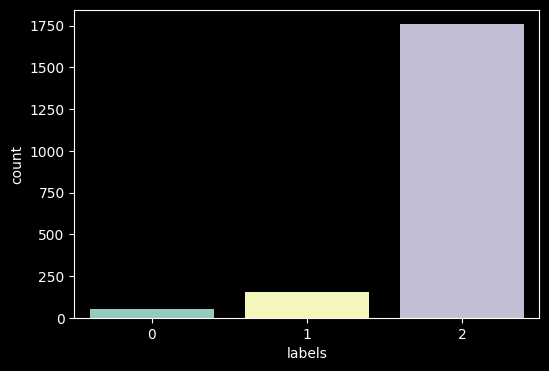

In [179]:
# Sets the figure size temporarily but has to be set again the next plot

plt.figure(figsize = (6,4))

# checking the  label class distribution

sns.countplot(y_train)

plt.show()


In [180]:
y_train.value_counts()

labels
2    1757
1     152
0      51
Name: count, dtype: int64

From the above plot, we can say our dataset is highly imbalanced.

Let's balance it first.

#### Sampling Methods-
- SMOTE 
- Oversampling- Adasyn
- Under Sampling

NOTE: We should do the train_test_split first and then sampling on TRAIN data only (we already did).

In [181]:
# there are multiple sampling_startegy, select according to use-case

smote = SMOTE(sampling_strategy = 'auto')

X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)


In [182]:
y_train_sampled.value_counts()

labels
1    1757
2    1757
0    1757
Name: count, dtype: int64

In [183]:
X_train.shape

(1960, 20)

In [184]:
y_train.shape

(1960,)

In [185]:
X_train_sampled.shape

(5271, 20)

In [186]:
y_train_sampled.shape

(5271,)

In [187]:
X_test.shape

(840, 20)

In [188]:
y_test.shape

(840,)

### Random Forest Classifier

#### Fitting the model on Train Data and checking the performance

In [189]:
# importing the important libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# create an instance of a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

# training the Random Forest model on the sampled train dataset
random_forest_model.fit(np.array(X_train_sampled), y_train_sampled)

# pedicting the labels on the test set
y_predicted_randomforest = random_forest_model.predict(np.array(X_test))



In [190]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# calculating the accuracy on train data
print('Accuracy Score on train data: ', metrics.accuracy_score(y_true = y_train_sampled,\
                                                               y_pred = random_forest_model.predict(X_train_sampled)))

# calculating the accuracy on test data
print('Accuracy Score on test data: ', metrics.accuracy_score(y_true = y_test, y_pred = y_predicted_randomforest))



Accuracy Score on train data:  0.9990514133940429
Accuracy Score on test data:  0.9714285714285714


#### Performance Parameters

In [191]:
print("****** Random Forest Model Prediction on Test Data ******")
print("*********************************************************\n")
print("--------- Confusion Matrix ---------\n\n", confusion_matrix(y_test, y_predicted_randomforest))
print("\n------------------------------------")
print("Acurracy Score:", accuracy_score(y_test, y_predicted_randomforest))
print("------------------------------------")
print("\n------ Classification Report -------\n\n", classification_report(y_test, y_predicted_randomforest))
print("--------------------------------------------------------")

****** Random Forest Model Prediction on Test Data ******
*********************************************************

--------- Confusion Matrix ---------

 [[ 23   0   3]
 [  0  68   0]
 [ 12   9 725]]

------------------------------------
Acurracy Score: 0.9714285714285714
------------------------------------

------ Classification Report -------

               precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.88      1.00      0.94        68
           2       1.00      0.97      0.98       746

    accuracy                           0.97       840
   macro avg       0.85      0.95      0.89       840
weighted avg       0.98      0.97      0.97       840

--------------------------------------------------------


#### Observations

On Training Dataset, we are getting good accuracy **(99.92%)**, Precision, Recall and F-score.

Also, on Testing data, we are getting accuracy: **96.90%**.

#### Let's save this model into a pickle file format

In [192]:
# model saving

import pickle

pickle.dump(random_forest_model, open("random_forest_models.pkl","wb"))


# Thank You!